In [1]:
#First we import required libraries in Python for analysis and graph plotting in Python.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#==
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 200)

In [2]:
#We imported the data provided in csv file into our jupiter notebook and check the data.
df = pd.read_csv('loan_data_set.csv')
df.head()

C:\Users\keshav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
#Then we check the columns which either have high number of NULL values or 100% NULL values. 
(df.isnull().sum(axis=0)/len(df.axes[0]))*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [4]:
#We remove those columns which have high or 100% NULL values.
df2 = df.drop(['total_il_high_credit_limit', 'total_bc_limit','total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75', 'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_tl_bal_gt_0', 'num_rev_accts', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl', 'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq', 'mths_since_recent_inq', 'mths_since_recent_bc_dlq', 'mths_since_recent_bc', 'mort_acc', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m', 'tot_cur_bal', 'tot_coll_amt', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'mths_since_last_major_derog','next_pymnt_d', 'desc', 'url', 'member_id' ], axis=1)
df2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [5]:
#We format the data and make changes in those columns which can be better analysed in numeric form.
df2['term'] = df2['term'].str.replace("months", "")
df2['int_rate'] = df2['int_rate'].str.replace("%", "")

In [6]:
#We change data type of those columns for suitable analysis and mathematical operations.
df2[['term']] = df2[['term']].astype(float)
df2[['int_rate']] = df2[['int_rate']].astype(float)

In [7]:
#We change index of dataset to "id" column for convenience.
df2.set_index('id', inplace=True)

In [8]:
#For convenient analysis, we created three new dataframes each corresponding to our customer type i.e Fully paid , Current and defaulted(Charged-off) 
df_defaulted  = df2[df2['loan_status'] == 'Charged Off']
df_full_pay  = df2[df2['loan_status'] == 'Fully Paid']
df_current  = df2[df2['loan_status'] == 'Current']

In [9]:
#First we try to understand the data with each of our created dataframe above.
df_defaulted.shape[0]

5627

In [10]:
df_full_pay.shape[0]


32950

In [11]:
df_current.shape[0]

1140

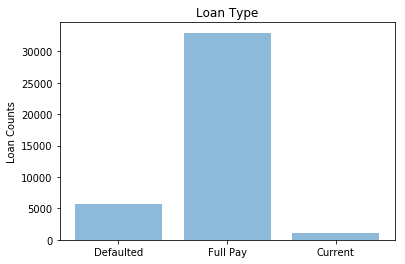

In [12]:
#Thus we found following statistics.

#Category			Loan Approved				Percentage
#Charged Off			5627					14.16773674
#Current				1140					2.870307425
#Fully Paid				32950					82.96195584
#Total					39717					100

loans = ('Defaulted', 'Full Pay', 'Current')
y_pos = np.arange(len(loans))
count = [df_defaulted.shape[0], df_full_pay.shape[0], df_current.shape[0]]
 
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, loans)
plt.ylabel('Loan Counts')
plt.title('Loan Type')
 
plt.show()

In [13]:
#Then we define a function. This function create 3 plots. Each plot corresponds to each variable and shows :
#1. Ration of defauters to total(defaluters + full_paid)
#2. Count of total loans
#3. Count of defaulted loans
#We used head(40) because after it, graph is not clearly visible in Python Jupiter notebook.
#For y=1, only first(1) graph visible. For y=2, first 1,2 graph visible. Else all three graphs are visible
def univ_analysis_fun(x,y):
    df_x = df2[[x]].apply(pd.value_counts)
    df_defaulted_x = df_defaulted[[x]].apply(pd.value_counts)
    df_full_pay_x = df_full_pay[[x]].apply(pd.value_counts)
    df_defaulted_x_ratio = (df_defaulted_x / (df_defaulted_x + df_full_pay_x ))
    df_defaulted_x_ratio.columns = df_defaulted_x_ratio.columns.str.replace(x,'Ratio')
    df_defaulted_x_ratio_sorted = df_defaulted_x_ratio.sort_values(by = ['Ratio'] , ascending=False).head(40)
    if y == 1:
        df_defaulted_x_ratio_sorted.plot.bar(y='Ratio')
        plt.show()
    elif y == 2:
        df_defaulted_x_ratio_sorted.plot.bar(y='Ratio')
        plt.show()
        df_x.head(40).plot.bar(y=x)
        plt.show() 
    else:
        df_defaulted_x_ratio_sorted.plot.bar(y='Ratio')
        plt.show()
        df_x.head(40).plot.bar(y=x)
        plt.show()
        df_defaulted_x.head(40).plot.bar()
        plt.show()

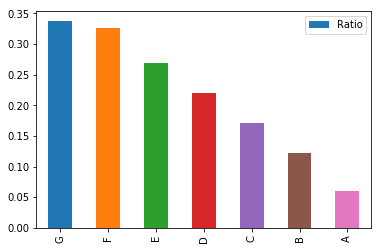

In [14]:
univ_analysis_fun('grade',1)

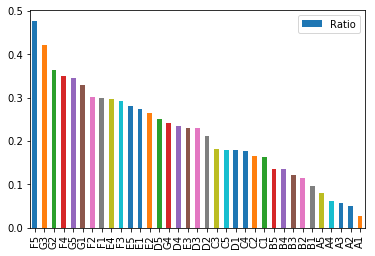

In [15]:
univ_analysis_fun('sub_grade',1)

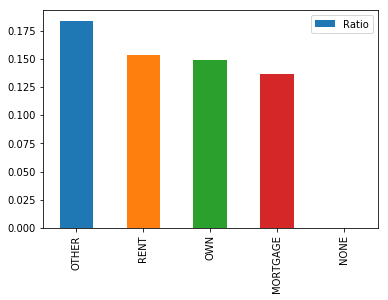

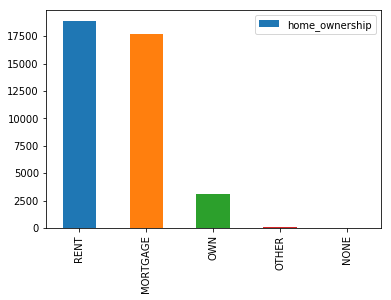

In [16]:
univ_analysis_fun('home_ownership',2)

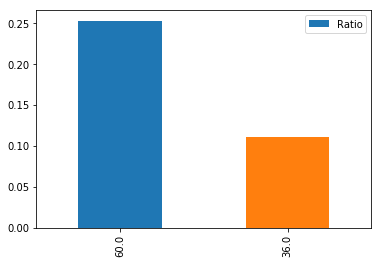

In [17]:
univ_analysis_fun('term',1)

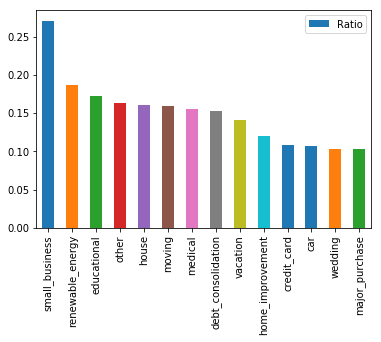

In [18]:
univ_analysis_fun('purpose',1)

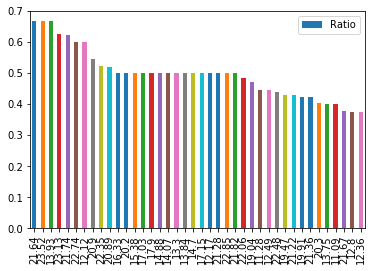

In [19]:
univ_analysis_fun('int_rate',1)

In [20]:
def biv_analysis_fun(x,y,z):
    df3 = df2[df2['purpose'] == z]
    df_defaulted2 = df_defaulted[df_defaulted['purpose'] == z]
    df_full_pay2 = df_full_pay[df_full_pay['purpose'] == z]
    df_xy = df3[[x]].apply(pd.value_counts)
    df_defaulted_x = df_defaulted2[[x]].apply(pd.value_counts)
    df_full_pay_x = df_full_pay2[[x]].apply(pd.value_counts)
    df_defaulted_x_ratio = (df_defaulted_x / (df_defaulted_x + df_full_pay_x ))
    df_defaulted_x_ratio.columns = df_defaulted_x_ratio.columns.str.replace(x,'Ratio')
    df_defaulted_x_ratio_sorted = df_defaulted_x_ratio.sort_values(by = ['Ratio'] , ascending=False).head(40)
    if y == 1:
        df_defaulted_x_ratio_sorted.plot.bar(y='Ratio')
        plt.show()


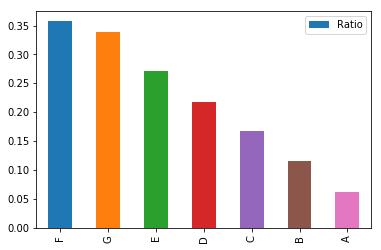

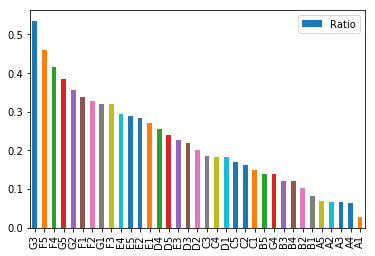

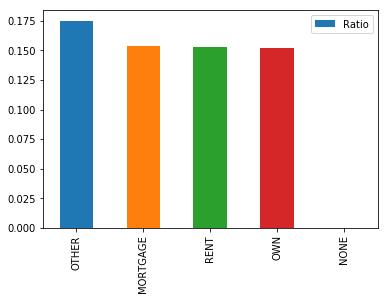

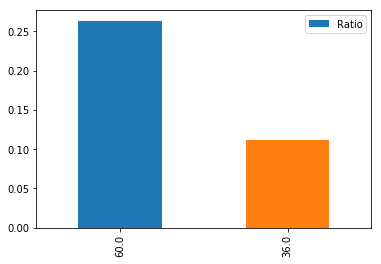

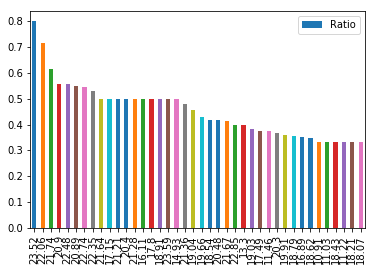

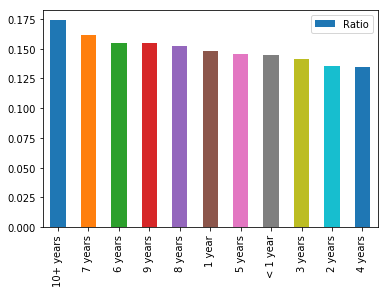

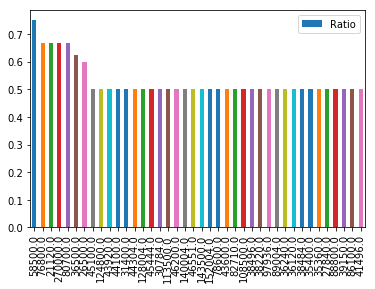

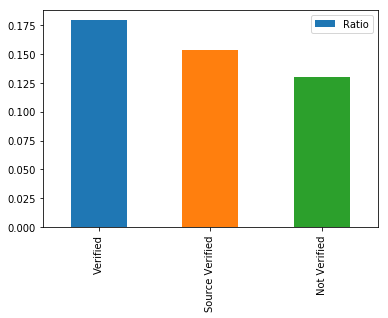

In [22]:
list_of_factors = ['grade', 'sub_grade', 'home_ownership', 'term', 'int_rate','emp_length','annual_inc','verification_status']

for i in list_of_factors:
    biv_analysis_fun(i,1,'debt_consolidation')